## Group3
### Members
1.Andrea Ulloa (20172597)
2.Ana Angulo (20171627)
3.Angela Coapaza (20171636) 

## Measuring predictive ability by Sample Splitting
---
The idea can be summarize in three steps:

1. We have to randomly partion the data into training and testing sample. Usually, the ratio is 75 (training) and 25 (testing). For example, the total data is N. Randomly 75%N values will be selected for the training group and 25%N will be the test group.   
2.  Then, the training data is what we will use to estimate the regressor coefficients. Once those estimates are obtained, they are used to evaluate their prediction quality on the test data (out of sample).

    Use training  $Y^{TR}$ ~ $X^{TR}_1$ , $X^{TR}_2$

    $\hat{Y}^{TR}$ =  $\hat{\beta}_1$ $X^{TR}_1$ + $\hat{\beta}_2$ $X^{TR}_2$

3. Finally, 
use the estimates of the training betas and recording out of sample mean square error and $R^2$

     $\hat{\beta}_1$ , $\hat{\beta}_2$ and $X^{Test}$, $Y^{Test}$

     We get the estimated Y from the test : $\hat{Y}^{Test}$

     $\hat{Y}^{Test}$ =  $\hat{\beta}_1$ $X^{Test}_1$ + $\hat{\beta}_2$ $X^{Test}_2$

     Finally, $MSE_{test}$ and $R^2_{test}$

     $MSE_{test}$ =  $\frac{\sum_{i \in Test} (Y^{Test} - \hat{Y}^{Test})}{25\%N}$  

     $R^2_{test}$ = $ 1 - \frac{MSE_{test}}{1/m *  \sum_{i \in Test} (Y_{Test}^2)}$

# Cross Validation
Cross validation is a resampling method that uses different folds of data to test and train amodel on diferent iterations.
This method is useful for assesing how the results of a statistical analysis will generalize to an independent data set. 

In k-folds cross-aidation we do the following: 
- As a first step for the cross validation we need to create a grid for each lambda. We will do so by spliting the data in k-folds of equal size.
- Next, we will fit the model using all folds but fold j, where j is defined as j=1,..., k. Then, we predict ou of sample on fold j. 
after that we compute the average mean squared prediction error across the k folds.
- By doing so, we will be chosing the lambda that minnimizes the following form: 
$\bar{Q}(\lambda)=\frac{1}{k}\sum_{j=1}^{k}\sum_{i\in{fold j}}^{}(y_i-(\alpha_0+x_i'\beta))^2+\lambda ||\beta||_1$



#  Replication of the PM1_Notebook1_Prediction_newdata using a restricted da

## Introduction

In this wage example, Y is the hourly wage of a worker and X is a vector of worker's characteristics, e.g., education, experience, gender. Two main questions here are:

How to use job-relevant characteristics, such as education and experience, to best predict wages?

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below  3 .

The variable of interest  Y  is the hourly wage rate constructed as the ratio of the annual earnings to the total number of hours worked, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. In our analysis, we also focus on single (never married) workers. The final sample is of size  **n=5150** .

## Data analysis

We start by loading the data set.

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Plots")
Pkg.add("RData")
Pkg.add("Compose")




using CSV
using DataFrames
using Dates
using Plots
using RData
using Compose



    Updating registry at `C:\Users\acoap\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes t

In [2]:
using Pkg
Pkg.add("CategoricalArrays")
using CategoricalArrays

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [3]:
rdata_read = load("../../data/wage2015_subsample_inference.RData")
data=rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


In [4]:
first(data,10)

10×20 DataFrame. Omitted printing of 13 columns
│ Row │ wage    │ lwage   │ sex     │ shs     │ hsg     │ scl     │ clg     │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 9.61538 │ 2.26336 │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │
│ 2   │ 48.0769 │ 3.8728  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │
│ 3   │ 11.0577 │ 2.40313 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 4   │ 13.9423 │ 2.63493 │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 5   │ 28.8462 │ 3.36198 │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │
│ 6   │ 11.7308 │ 2.46222 │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │
│ 7   │ 19.2308 │ 2.95651 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 8   │ 19.2308 │ 2.95651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 9   │ 12.0    │ 2.48491 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 10  │ 19.2308 │ 2.95651 │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │

In [40]:
describe(data)

20×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean      │ min     │ median  │ max     │ nunique │
│     │ Symbol   │ Union…    │ Any     │ Union…  │ Any     │ Union…  │
├─────┼──────────┼───────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ wage     │ 17.8544   │ 3.36538 │ 14.6154 │ 528.846 │         │
│ 2   │ lwage    │ 2.71856   │ 1.21354 │ 2.68207 │ 6.2707  │         │
│ 3   │ sex      │ 0.321948  │ 0.0     │ 0.0     │ 1.0     │         │
│ 4   │ shs      │ 0.0872093 │ 0.0     │ 0.0     │ 1.0     │         │
│ 5   │ hsg      │ 0.912791  │ 0.0     │ 1.0     │ 1.0     │         │
│ 6   │ scl      │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 7   │ clg      │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 8   │ ad       │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 9   │ mw       │ 0.286337  │ 0.0     │ 0.0     │ 1.0     │         │
│ 10  │ so       │ 0.291424  │ 0.0     │ 0.0     │ 1.0     │         │
│ 11  │ we       │ 0.198401  │ 0.0     │ 0.0     │ 1.0     │         │
│ 12  │ ne       │ 0.223837  │ 0.0     │ 0.0     │ 1.0     │         │
│ 13  │ exp1     │ 17.19     │ 5.0     │ 14.0    │ 47.0    │         │
│ 14  │ exp2     │ 4.02953   │ 0.25    │ 1.96    │ 22.09   │         │
│ 15  │ exp3     │ 11.4344   │ 0.125   │ 2.744   │ 103.823 │         │
│ 16  │ exp4     │ 36.1583   │ 0.0625  │ 3.8416  │ 487.968 │         │
│ 17  │ occ      │           │ 20      │         │ 1e+05   │ 237     │
│ 18  │ occ2     │           │ 1       │         │ 22      │ 22      │
│ 19  │ ind      │           │ 370     │         │ 1e+05   │ 190     │
│ 20  │ ind2     │           │ 2       │         │ 22      │ 21      │

# 3.1. Filter the data

Now, we focus only on a subset of the data. For this porpouse, we use shs and hsg variables.

In [5]:
data_new = filter(row -> (row.shs == 1|| row.hsg == 1) , data)

1376×20 DataFrame. Omitted printing of 13 columns
│ Row  │ wage    │ lwage   │ sex     │ shs     │ hsg     │ scl     │ clg     │
│      │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 11.0577 │ 2.40313 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 2    │ 19.2308 │ 2.95651 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 3    │ 19.2308 │ 2.95651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 4    │ 12.0    │ 2.48491 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 5    │ 17.3077 │ 2.85115 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 6    │ 12.0192 │ 2.48651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 7    │ 27.8846 │ 3.32808 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 8    │ 21.6    │ 3.07269 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 9    │ 19.2308 │ 2.95651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 10   │ 13.1868 │ 2.57922 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
⋮
│ 1366 │ 15.6979 │ 2.75352 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1367 │ 8.65385 │ 2.158   │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1368 │ 12.0192 │ 2.48651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1369 │ 12.5    │ 2.52573 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1370 │ 9.61538 │ 2.26336 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1371 │ 12.0192 │ 2.48651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1372 │ 12.9808 │ 2.56347 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1373 │ 13.4615 │ 2.59984 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1374 │ 22.5962 │ 3.11778 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1375 │ 16.8269 │ 2.82298 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1376 │ 32.967  │ 3.49551 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │

### Describing the main variables 

Let's go to **describe the main variables** that we will use later to obtain the causal effect of sex on income: 

wage, log-wage, sex, some college, college graduate, avdanced degree, experience

Let's have a look at the structure of the data.

In [6]:
describe(data_new)

20×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean      │ min     │ median  │ max     │ nunique │
│     │ Symbol   │ Union…    │ Any     │ Union…  │ Any     │ Union…  │
├─────┼──────────┼───────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ wage     │ 17.8544   │ 3.36538 │ 14.6154 │ 528.846 │         │
│ 2   │ lwage    │ 2.71856   │ 1.21354 │ 2.68207 │ 6.2707  │         │
│ 3   │ sex      │ 0.321948  │ 0.0     │ 0.0     │ 1.0     │         │
│ 4   │ shs      │ 0.0872093 │ 0.0     │ 0.0     │ 1.0     │         │
│ 5   │ hsg      │ 0.912791  │ 0.0     │ 1.0     │ 1.0     │         │
│ 6   │ scl      │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 7   │ clg      │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 8   │ ad       │ 0.0       │ 0.0     │ 0.0     │ 0.0     │         │
│ 9   │ mw       │ 0.286337  │ 0.0     │ 0.0     │ 1.0     │         │
│ 10  │ so       │ 0.291424  │ 0.0     │ 0.0     │ 1.0     │         │
│ 11  │ we       │ 0.198401  │ 0.0     │ 0.0     │ 1.0     │         │
│ 12  │ ne       │ 0.223837  │ 0.0     │ 0.0     │ 1.0     │         │
│ 13  │ exp1     │ 17.19     │ 5.0     │ 14.0    │ 47.0    │         │
│ 14  │ exp2     │ 4.02953   │ 0.25    │ 1.96    │ 22.09   │         │
│ 15  │ exp3     │ 11.4344   │ 0.125   │ 2.744   │ 103.823 │         │
│ 16  │ exp4     │ 36.1583   │ 0.0625  │ 3.8416  │ 487.968 │         │
│ 17  │ occ      │           │ 20      │         │ 1e+05   │ 237     │
│ 18  │ occ2     │           │ 1       │         │ 22      │ 22      │
│ 19  │ ind      │           │ 370     │         │ 1e+05   │ 190     │
│ 20  │ ind2     │           │ 2       │         │ 22      │ 21      │

In [6]:
[eltype(col) for col = eachcol(data_new)]

20-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 Float64
 CategoricalValue{String, UInt16}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}
 CategoricalValue{String, UInt8}

In [7]:
# first 10 lines of the data
first(data_new,10)

10×20 DataFrame. Omitted printing of 13 columns
│ Row │ wage    │ lwage   │ sex     │ shs     │ hsg     │ scl     │ clg     │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 11.0577 │ 2.40313 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 2   │ 19.2308 │ 2.95651 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 3   │ 19.2308 │ 2.95651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 4   │ 12.0    │ 2.48491 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 5   │ 17.3077 │ 2.85115 │ 1.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 6   │ 12.0192 │ 2.48651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 7   │ 27.8846 │ 3.32808 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 8   │ 21.6    │ 3.07269 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 9   │ 19.2308 │ 2.95651 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 10  │ 13.1868 │ 2.57922 │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │

In [53]:
typeof(data_new), size(data_new)

(DataFrame, (1376, 20))

#### Wage and lwage

The following graph shows the hourly wage density. As can be seen, the distribution has a large tail to the right (positive asymmetric distribution), that is, there are unusually high values. While most observations are concentrated in values less than 100.

In [8]:
Pkg.add("Gadfly")
using Gadfly

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


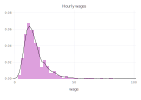

In [9]:
Gadfly.plot(data_new, Coord.cartesian(xmin=0, xmax=100),
    layer(x = "wage", Geom.density , color=[colorant"black"]),
    layer(x = "wage", Geom.histogram(bincount=200, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Hourly wages")
)

Due to the problem of outlayers, the variable of the logarithm of wages is created. This corrects the asymmetry presented by the original data.

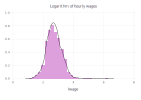

In [10]:
Gadfly.plot(data_new, Coord.cartesian(xmin=0, xmax=8),
    layer(x = "lwage", Geom.density , color=[colorant"black"]),
    layer(x = "lwage", Geom.histogram(bincount=30, density=true, limits=(min=0,)),
    color=[colorant"plum"]),
    Guide.title("Logarithm of hourly wages")
)

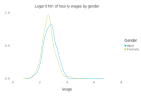

In [11]:
using Gadfly, Distributions
data_new_1=copy(data_new)
data_new_1[!,:sex] = string.(data_new[!,:sex]) 
replace!(data_new_1.sex, "1.0" => "Female")
replace!(data_new_1.sex, "0.0" => "Male")
rename!(data_new_1, "sex" => "Gender")
Gadfly.plot(data_new_1, x = "lwage", color="Gender", Geom.density, style(line_width=3mm), 
    Guide.title("Logarithm of hourly wages by gender"),
    Theme(grid_color = colorant"white", grid_color_focused = colorant"white")
)


In [12]:
# The numbers of men and women in our sample.
using Compose

insertcols!(data_new_1,3
    ,:Freq => 1)  
data_new_1=combine(groupby(data_new_1, [:Gender]),:Freq=>sum=>:Frequency)

2×2 DataFrame
│ Row │ Gender │ Frequency │
│     │ String │ Int64     │
├─────┼────────┼───────────┤
│ 1   │ Male   │ 933       │
│ 2   │ Female │ 443       │

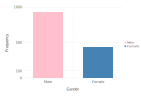

In [13]:
Gadfly.plot(data_new_1, x=:Gender,y=:Frequency,color=:Gender, Geom.bar(position=:dodge),
    Theme(bar_spacing=2cm, minor_label_font_size = 3.5mm),
    Scale.color_discrete_manual("pink","steelblue"),
    Guide.xticks(orientation=:horizontal),
    Guide.colorkey(""),
    Guide.yticks(ticks=[0,100,500,1000])
)

As we can see, there are more men with high school degrees than women in our sample of unmarried workers.

In [62]:
# How many women have some college compared to men?
# How many women have completed college compared to men?

replace!(data_new_1.hsg, 1 => 2)
replace!(data_new_1.scl, 1 => 3)
replace!(data_new_1.clg, 1 => 4)
replace!(data_new_1.ad,  1 => 5)
data_new_1=select(data_new_1,:wage,:lwage,:Gender,:shs,:hsg,:scl,:clg,:ad,:ne,:mw,:so,:we,:exp1,[:shs, :hsg, :scl, :clg, :ad] => (+) => :EducationLevel)

data_new_1[!,:EducationLevel] = string.(data_new_1[!,:EducationLevel]) 
replace!(data_new_1.EducationLevel, "1.0" => "A_SomeHighschool")
replace!(data_new_1.EducationLevel, "2.0" => "B_HighschoolGraduate")
replace!(data_new_1.EducationLevel, "3.0" => "C_SomeCollege")
replace!(data_new_1.EducationLevel, "4.0" => "D_CollegeGraduate")
replace!(data_new_1.EducationLevel, "5.0" => "E_AdvancedDegree")
select(data_new_1,:lwage,:shs,:scl,:hsg,:clg,:ad,:EducationLevel)

LoadError: ArgumentError: column name :hsg not found in the data frame

In [14]:
Pkg.add("Distributions")
using Distributions

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


Now, we are constructing the output variable $Y$ and the matrix $Z$ which includes the characteristics of workers that are given in the data.

In [15]:
n = size(data_new)[1]
z = select(data_new, Not([:lwage, :wage]))
p = size(z)[2] 

println("Number of observations : ", n, "\n","Number of raw regressors:", p )

Number of observations : 1376
Number of raw regressors:18


For the outcome variable *wage* and a subset of the raw regressors, we calculate the empirical mean to get familiar with the data.

In [16]:
z_subset = select(data_new, ["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])
describe(z_subset, :mean)

12×2 DataFrame
│ Row │ variable │ mean      │
│     │ Symbol   │ Float64   │
├─────┼──────────┼───────────┤
│ 1   │ lwage    │ 2.71856   │
│ 2   │ sex      │ 0.321948  │
│ 3   │ shs      │ 0.0872093 │
│ 4   │ hsg      │ 0.912791  │
│ 5   │ scl      │ 0.0       │
│ 6   │ clg      │ 0.0       │
│ 7   │ ad       │ 0.0       │
│ 8   │ mw       │ 0.286337  │
│ 9   │ so       │ 0.291424  │
│ 10  │ we       │ 0.198401  │
│ 11  │ ne       │ 0.223837  │
│ 12  │ exp1     │ 17.19     │

The proportion of female workers in our sample is ~32% ( 𝑠𝑒𝑥=1 if female). Compared to the full data set (44%), this percentage is lower.

# Prediction Question


Now, we will construct a prediction rule for hourly wage $Y$ , which depends linearly on job-relevant characteristics  $X$:

$$Y = \beta' X + \epsilon $$
 
Our goals are

* Predict wages using various characteristics of workers.

* Assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample $MSE$ and $R^2$.

We employ two different specifications for prediction:

- **Basic Model**: $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators, occupation and industry indicators, regional indicators). That is sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2'

- **Flexible Model**: $X$ consists of all raw regressors from the basic model without sex plus occupation and industry indicators, transformations (e.g.,$exp2$, $exp3$ and $exp4$ ) and additional two-way interactions of polynomial in experience with other regressors.  That is (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)

Using the **Flexible Model**, enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver good prediction accuracy but give models which are harder to interpret.

Now, let us fit both models to our data by running ordinary least squares (ols):

In [17]:
#Needed Packages and extra just in case
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


We have to drop the hsg, scl and clg variables because of multicolinearity.

In [18]:
# 1. basic model
basic  = @formula(lwage ~ (sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2))
basic_results  = lm(basic, data_new)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + scl + clg + mw + so + we + occ2 + ind2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                   Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.75187       0.144638     19.03    <1e-70    2.46813       3.03562
sex          -0.0733094     0.0314431    -2.33    0.0199   -0.134993     -0.0116259
exp1          0.00757417    0.00125148    6.05    <1e-08    0.00511908    0.0100293
shs           0.0         NaN           NaN       NaN     NaN           NaN
hsg           0.0811342     0.0454977     1.78    0.0748   -0.00812098    0.170389
scl           0.0         NaN           NaN       NaN     NaN      

##### Note that the basic model consists of $48$ regressors. Three regressors were dropped out.

In [21]:

Pkg.add("StatsModels")
Pkg.add("Combinatorics")
Pkg.add("IterTools")
using StatsModels, Combinatorics, IterTools

combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)
expand_exp(args, deg::ConstantTerm) =
    tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
    apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.FullRank, ctx::Type) =
    apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


In [22]:
# 2. flexible model
flex_ori = @formula(lwage ~ sex + (exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we)^2)
regflex = lm(flex_ori, data_new)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & shs + exp1 & hsg + exp1 & scl + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & shs + exp2 & hsg + exp2 & scl + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & shs + exp3 & hsg + exp3 & scl + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & scl + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we + shs & hsg + shs & scl + shs & clg + shs & occ2 + shs & ind2 + shs & mw + shs & so + shs & we + hsg & scl + hsg & clg + hsg & occ2 + hsg & ind2 + hsg & mw + hsg & so + hsg & we

## Lasso Extra Fexible Model

# Coefplots

In [23]:
function coefplot(m)
        DF  = DataFrame(x=coefnames(m),y=coef(m), mins=confint(m)[:,1], maxs=confint(m)[:,2])[2:end,:] #no intercept,
        Gadfly.plot(DF, x=:x, y=:y, ymin=:mins, ymax=:maxs,
        Geom.point, Geom.errorbar,
        Guide.xlabel(""),
        Guide.ylabel("")
        )
end

coefplot (generic function with 1 method)

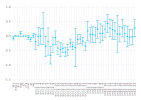

In [24]:
coefplot(basic_results)

In [25]:
coefplot(regflex)

##### Evaluating the performance of both models based on the (adjusted) $R^2_{sample}$ and the (adjusted) $MSE_{sample}$:


In [26]:
# Assess the predictive performance
R2_1 = r2(basic_results)
println("R-squared for the basic model: ", R2_1, "\n")
R2_ADJ_1 = adjr2(basic_results)
println("Adjusted R-squared for the basic model: ", R2_ADJ_1, "\n")

R2_2 = r2(regflex)
println("R-squared for the basic model: ", R2_2, "\n")
R2_ADJ_2 = adjr2(regflex)
println("Adjusted R-squared for the basic model: ", R2_ADJ_2, "\n")

R-squared for the basic model: 0.1802381487672099

Adjusted R-squared for the basic model: 0.15122549288773612

R-squared for the basic model: 0.5017414107227822

Adjusted R-squared for the basic model: 0.22935257563984868



In [ ]:
# calculating the MSE


# Two cases of Partialling-Out using lasso.

### Case 1: Matrix W = 'exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'

In [36]:
Pkg.add("Lasso")
using Lasso

basic_y = @formula(lwage ~ (exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2)) #model for Y
basic_d = @formula(sex ~ (exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we)^2) #model for D
#Partialling-out the linear effect of W from Y
tb_y = residuals(fit(LassoModel,basic_y, data_new,standardize = false))
#Partialling-out the linear effect of W from D
tb_d = residuals(fit(LassoModel,basic_d, data_new,standardize = false))

datab_partial = DataFrame(tb_y = tb_y, tb_d = tb_d)
# regression of Y on D after partialling out the effect of W
partialb_lasso_fit =lm(@formula(tb_y~tb_d), datab_partial)
partialb_lasso_est =GLM.coef(partialb_lasso_fit)[2]

println("Coefficient for D via partialling-out using lasso :", partialb_lasso_est)

#standard error
partialb_lasso_se = GLM.stderror(partialb_lasso_fit)[2];

Coefficient for D via partialling-out using lasso :-0.12333162337449222


   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


The use of the lasso for partialling-out the basic regressions shows us that the gender gap is of $12.33\%$ , which is different from the $7\%$ gap found int the basic regression using OLS. This can be explained by the fact that lasso supresses some of the regressors but not all of them, and because partialling out controls for the covariates in the both regressions.

Next we try "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls.

In [ ]:
### Case 2: Partialling-Out using lasso 2 : Matrix W = (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2'


In [35]:
Pkg.add("Lasso")
using Lasso

extraflex_y = @formula(lwage ~ (exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we)^2) #model for Y
extraflex_d = @formula(sex ~ (exp1 + exp2 + exp3 + exp4 + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we)^2) #model for D
#Partialling-out the linear effect of W from Y
t_y = residuals(fit(LassoModel,extraflex_y, data_new,standardize = false))
#Partialling-out the linear effect of W from D
t_d = residuals(fit(LassoModel,extraflex_d, data_new,standardize = false))

data_partial = DataFrame(t_y = t_y, t_d = t_d)
# regression of Y on D after partialling out the effect of W
partial_lasso_fit =lm(@formula(t_y~t_d), data_partial)
partial_lasso_est =GLM.coef(partial_lasso_fit)[2]

println("Coefficient for D via partialling-out using lasso :", partial_lasso_est)

#standard error
partial_lasso_se = GLM.stderror(partial_lasso_fit)[2];


Coefficient for D via partialling-out using lasso :-0.05467522092745655


   Resolving package versions...
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\acoap\.julia\environments\v1.7\Manifest.toml`


The use of the lasso for partialling-out the basic regressions shows us that the gender gap is of  5.4%  , which is different from the  7%  gap found int the basic regression using OLS but pretty similar to the $ found on the basic regression model with partialling-out. Above the possible reasons already mentioned, in this flexible model we have more regressors but also controlled by the penalty value .